In [313]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [314]:
df = pd.read_csv("multiclass.csv")

In [315]:
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


**24Seven** is a retail chain, which has different stores buying various products. Based on the purchase history we want to divide the stores into classes for better inventory management and customer handling.

**Data Description:**


| Id | Features | Description |
| :-- | :--| :--|
|01| **Region** | Region of the store (1: Less purchase 2: frequent purchase 3: high purchase|
|02| **Fresh** | How many fresh items are brought |
|03|**Milk**| How many units of Milk is purchased |
|04|**Grocery**|Units of Grocery bought for the store |
|05|**Frozen**|Frozen items purchased |
|06|**Detergents_Paper**|Unit of Detergents and paper bought |
|07|**Delicassen**|Food related items |
|08|**class**| Type/Category of the Store (1 ,2 , 3)|

In [316]:
df.shape

(440, 8)

In [317]:
df.isnull().sum()

Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
class               0
dtype: int64

In [318]:
df.describe()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,2.195455
std,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,0.744289
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,1.000000
25%,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,2.000000
50%,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,2.000000
75%,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,3.000000
max,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,3.000000


In [319]:
# Check unique Regions and their counts
df['Region'].value_counts()

Region
3    316
1     77
2     47
Name: count, dtype: int64

In [320]:
# Check unique classes and their counts
df['class'].value_counts()

class
2    180
3    173
1     87
Name: count, dtype: int64

**One-Hot Encode Regions and class** as both are **Categorical data**

In [321]:
region_col = df[['Region']]

# Initialize and apply encoder
encoder = OneHotEncoder(sparse_output=False)
region_encoded = encoder.fit_transform(region_col)

# Get column names and create a DataFrame
region_feature_names = encoder.get_feature_names_out(['Region'])
region_df = pd.DataFrame(region_encoded, columns=region_feature_names)

# Concatenate with original data
df = pd.concat([df.drop('Region', axis=1), region_df], axis=1)

class_col = df[['class']]

# Initialize and apply encoder
encoder = OneHotEncoder(sparse_output=False)
class_encoded = encoder.fit_transform(class_col)

# Get column names and create a DataFrame
class_feature_names = encoder.get_feature_names_out(['class'])
class_df = pd.DataFrame(class_encoded, columns=class_feature_names)

# Concatenate with original data
df = pd.concat([df.drop('class', axis=1), class_df], axis=1)

In [322]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3,class_1,class_2,class_3
0,12669,9656,7561,214,2674,1338,0.0,0.0,1.0,0.0,1.0,0.0
1,7057,9810,9568,1762,3293,1776,0.0,0.0,1.0,0.0,1.0,0.0
2,6353,8808,7684,2405,3516,7844,0.0,0.0,1.0,0.0,1.0,0.0
3,13265,1196,4221,6404,507,1788,0.0,0.0,1.0,1.0,0.0,0.0
4,22615,5410,7198,3915,1777,5185,0.0,0.0,1.0,1.0,0.0,0.0


In [323]:
X = df.drop(columns=['class_1','class_2','class_3'])
y = df[['class_1','class_2','class_3']]

**Visualizing the data using PCA**

In [324]:
from sklearn.decomposition import PCA

# reducing features to just 2 features
pca = PCA(n_components=2)
visual_1 = pca.fit_transform(X)
visual_1.shape

(440, 2)

[0.45961362 0.40517227]


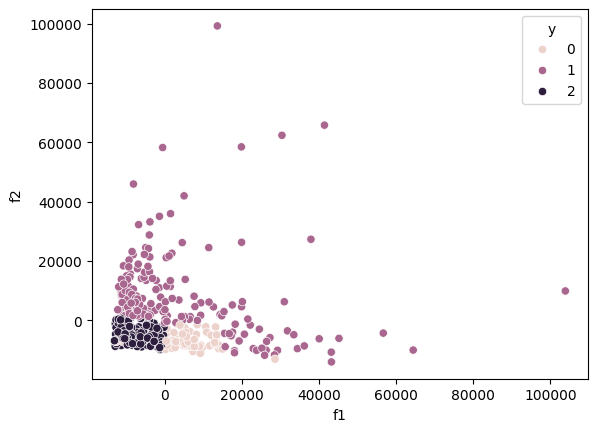

In [325]:
df2 = pd.DataFrame(visual_1, columns=['f1', 'f2'])
df2['y'] = np.argmax(y.values, axis=1)  # converts: [1, 0, 0] → 0 (class 1), [0, 1, 0] → 1 (class 2), [0, 0, 1] → 2 (class 3)
print(pca.explained_variance_ratio_)
sns.scatterplot(data= df2, x= 'f1',y = 'f2' , hue = 'y')
plt.show()

**Observation**

Data is not linearly separable. Hence, best strategy would be to use Deep Neural Network

**Splitting Data into Train, Validation and Test Data**

In [326]:
from sklearn.model_selection import train_test_split

# 90% Train+Val → X_train_val, y_train_val # 10% Test set → X_test, y_test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42) 

# 90% Train → X_train, y_train (i.e., 81% of original data) # 10% Validation → X_val, y_val (i.e., 9% of original data)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)

print('Train : ', X_train.shape, y_train.shape)
print('Validation:', X_val.shape, y_val.shape)
print('Test  : ', X_test.shape, y_test.shape)

Train :  (356, 9) (356, 3)
Validation: (40, 9) (40, 3)
Test  :  (44, 9) (44, 3)


**Standardizing the data**

Standardization rescales all features so that they have:

* Mean = 0
* Standard deviation = 1

This helps:

* Speed up model convergence
* Avoid domination by features with larger scales
* Improve performance for models like neural networks

In [327]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [328]:
np.mean(X_train, axis=0)

array([ 5.98771968e-17,  1.24744160e-17, -4.98976640e-18,  1.99590656e-17,
        1.49692992e-17,  1.74641824e-17,  2.49488320e-17,  1.49692992e-17,
        1.19754394e-16])

In [329]:
# Above values are close to 0

In [330]:
np.std(X_train, axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

Why fit_transform on X_train and only transform on X_val / X_test?

--> Because on X_train, we learn and apply scaling.
X_val & X_test - Reuse training mean/std

**We can create 7 layers NN**

<img src="nn_7layers.png">

**Layers Description:**


| Layer | Descrption |
| :-- | :--|
| **L1** | Input Layer|
| **L2** | Contains 32 Neurons|
|**L3** |Contains 64 Neurons|
|**L4** |Contains 128 Neurons|
|**L5** |Contains 64 Neurons |
|**L6** |Contains 32 Neurons|
|**L7** |Output Layer |

<br>

**Note:** In Between the layers, we will use:
- ReLU as the Activation function

In [331]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Define the model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # Input + L2
    Dense(64, activation='relu'),                                   # L3
    Dense(128, activation='relu'),                                  # L4
    Dense(64, activation='relu'),                                   # L5
    Dense(32, activation='relu'),                                   # L6
    Dense(3, activation='softmax')                                  # L7 (Output)
])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**SGD (No Momentum)**

In [332]:
# Compile with plain SGD (no momentum)
model.compile(
    optimizer=SGD(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [333]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32
)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5383 - loss: 1.0618 - val_accuracy: 0.7000 - val_loss: 1.0468
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5787 - loss: 1.0528 - val_accuracy: 0.7250 - val_loss: 1.0244
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6082 - loss: 1.0400 - val_accuracy: 0.7000 - val_loss: 1.0022
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6784 - loss: 1.0269 - val_accuracy: 0.7500 - val_loss: 0.9880
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6925 - loss: 0.9947 - val_accuracy: 0.7500 - val_loss: 0.9707
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7147 - loss: 0.9937 - val_accuracy: 0.8000 - val_loss: 0.9583
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7261 - loss: 0.9810 - val_accuracy: 0.8000 - val_loss: 0.9450
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7342 - loss: 0.9633 - val_accuracy: 0.7750 - val_loss:

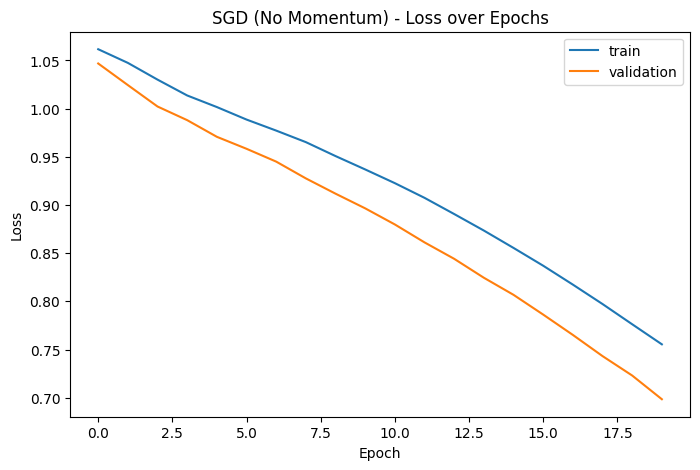

In [334]:
# Plot training and validation loss
plt.figure(figsize=(8, 5))

epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.title('SGD (No Momentum) - Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

**SGD + Momentum**

In [335]:
# Compile with SGD + momentum
model.compile(
    optimizer=SGD(momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [336]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32
)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7423 - loss: 0.7356 - val_accuracy: 0.8250 - val_loss: 0.5882
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8012 - loss: 0.5903 - val_accuracy: 0.8500 - val_loss: 0.4393
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8270 - loss: 0.4409 - val_accuracy: 0.8500 - val_loss: 0.3558
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8647 - loss: 0.3689 - val_accuracy: 0.9250 - val_loss: 0.3344
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8880 - loss: 0.3426 - val_accuracy: 0.8500 - val_loss: 0.3344
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9209 - loss: 0.2665 - val_accuracy: 0.8750 - val_loss: 0.3137
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8658 - loss: 0.3325 - val_accuracy: 0.8750 - val_loss: 0.3180
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9034 - loss: 0.2679 - val_accuracy: 0.9000 - val_loss:

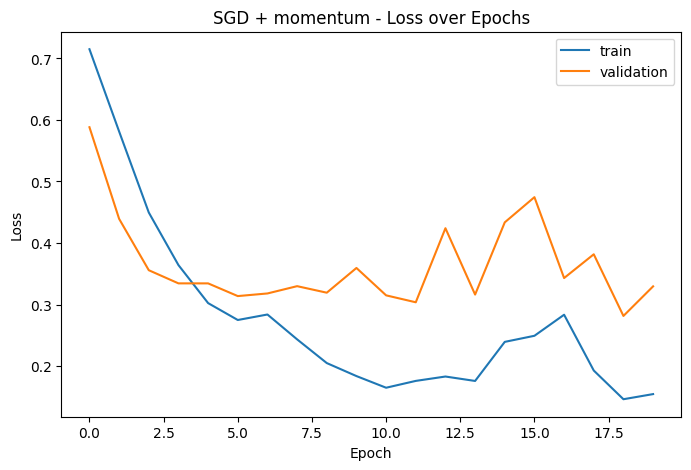

In [338]:
# Plot training and validation loss
plt.figure(figsize=(8, 5))

epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.title('SGD + momentum - Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Adagrad**

In [341]:
from tensorflow.keras.optimizers import Adagrad

# Compile with Adagrad
model.compile(
    optimizer=Adagrad(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [342]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32
)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9770 - loss: 0.1110 - val_accuracy: 0.8750 - val_loss: 0.3214
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9693 - loss: 0.1332 - val_accuracy: 0.8750 - val_loss: 0.3162
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9734 - loss: 0.1221 - val_accuracy: 0.8750 - val_loss: 0.3149
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9677 - loss: 0.1450 - val_accuracy: 0.9000 - val_loss: 0.3130
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9619 - loss: 0.1291 - val_accuracy: 0.9000 - val_loss: 0.3118
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9700 - loss: 0.1354 - val_accuracy: 0.9000 - val_loss: 0.3124
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9762 - loss: 0.1202 - val_accuracy: 0.9000 - val_loss: 0.3160
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9763 - loss: 0.1008 - val_accuracy: 0.9000 - val_loss:

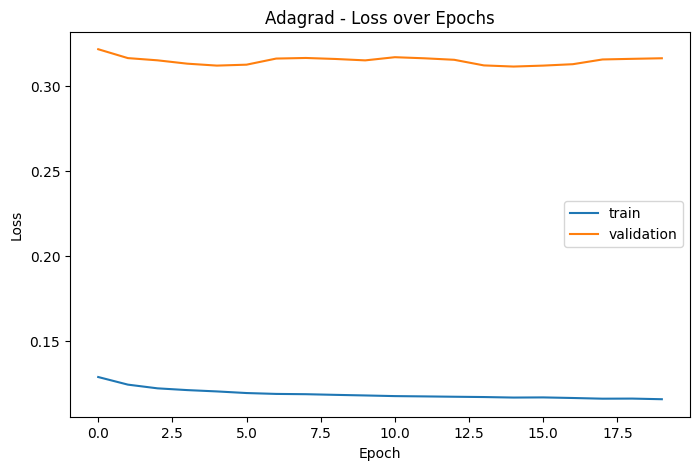

In [343]:
# Plot training and validation loss
plt.figure(figsize=(8, 5))

epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.title('Adagrad - Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

**RMSProp**

In [344]:
from tensorflow.keras.optimizers import RMSprop

# Compile with RMSprop
model.compile(
    optimizer=RMSprop(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [345]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32
)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9598 - loss: 0.1517 - val_accuracy: 0.9250 - val_loss: 0.3781
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9429 - loss: 0.1677 - val_accuracy: 0.8500 - val_loss: 0.4061
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9607 - loss: 0.1250 - val_accuracy: 0.9000 - val_loss: 0.3458
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9630 - loss: 0.1582 - val_accuracy: 0.9000 - val_loss: 0.3675
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9858 - loss: 0.0840 - val_accuracy: 0.9000 - val_loss: 0.3665
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9621 - loss: 0.1210 - val_accuracy: 0.8750 - val_loss: 0.3893
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9834 - loss: 0.0758 - val_accuracy: 0.8500 - val_loss: 0.4403
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9691 - loss: 0.1366 - val_accuracy: 0.9000 - val_loss:

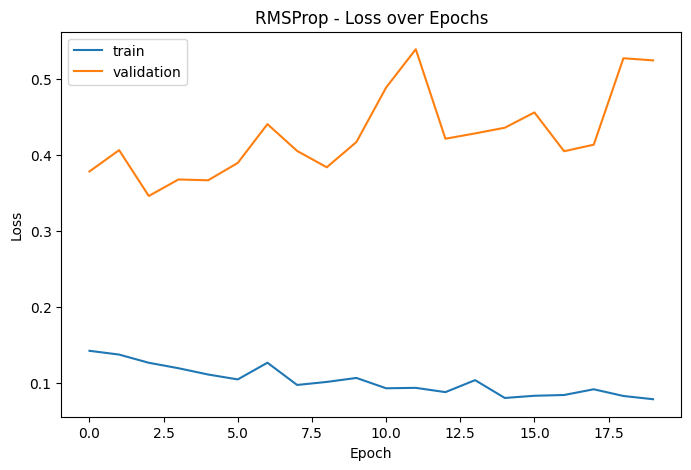

In [346]:
# Plot training and validation loss
plt.figure(figsize=(8, 5))

epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.title('RMSProp - Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Adam**

In [347]:
from tensorflow.keras.optimizers import Adam

# Compile with Adam
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [352]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32
)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9971 - loss: 0.0140 - val_accuracy: 0.8500 - val_loss: 0.9335
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9866 - loss: 0.0222 - val_accuracy: 0.8500 - val_loss: 0.9399
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9893 - loss: 0.0254 - val_accuracy: 0.8500 - val_loss: 1.0138
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9950 - loss: 0.0120 - val_accuracy: 0.8500 - val_loss: 1.0087
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9941 - loss: 0.0143 - val_accuracy: 0.8500 - val_loss: 0.9911
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9914 - loss: 0.0147 - val_accuracy: 0.8500 - val_loss: 0.9944
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9931 - loss: 0.0113 - val_accuracy: 0.8500 - val_loss: 0.9994
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9982 - loss: 0.0131 - val_accuracy: 0.8500 - val_loss:

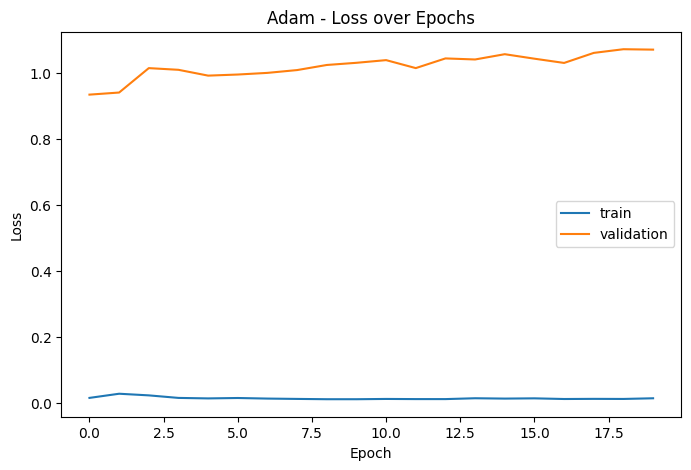

In [353]:
# Plot training and validation loss
plt.figure(figsize=(8, 5))

epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.title('Adam - Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()